In [1]:
import pandas as pd
import pickle
import copy
import cobra
import matplotlib.pyplot as plt
from cobra.io import read_sbml_model,write_sbml_model
from functools import reduce 
%matplotlib inline

In [2]:
mutant1 = read_sbml_model('mutant1.xml')

In [4]:
data=pd.read_excel('C:\\Users\\02700282\\OneDrive - Elanco\\Mycomputer\\German_handover\\FinalReport\\FinalReport\\Data\\ExperimentalConstraints.xlsx')

In [5]:
data

,Strain,Time,Glucose uptake,Lipid uptake (mmol palmitate/L/h),O2 uptake (mmol/L/h),CE (mmol/L/h),Potency (mmol/L/h),NH3 (mmol/L/h),MonensinA,MonensinB
0,730_0,14,8.920047,0.000000,34.8,37.8,0.008539,0.071763,0.012120,0.000000
1,730_7,14,7.389152,0.000000,29.4,31.8,0.003516,0.072902,0.001170,0.002346
2,730_12,14,9.622771,0.000000,35.4,39.0,0.005609,0.053197,0.002761,0.002847
3,730_20,14,9.231999,0.000000,33.6,37.8,0.002728,0.098197,0.001082,0.001646
4,730_0,25,8.920047,0.000000,36.0,37.8,0.001601,0.071763,0.000000,0.001601
5,730_7,25,7.389152,0.000000,31.2,32.4,0.013034,0.072902,0.007481,0.005553
6,730_12,25,9.622771,0.000000,30.6,30.6,0.009110,0.053197,0.004954,0.004157
7,730_20,25,9.231999,0.000000,39.0,41.4,0.009700,0.098197,0.006140,0.003560
8,730_0,38,3.193813,0.726009,28.2,21.6,0.017141,-0.035546,0.016756,0.000384
9,730_7,38,6.376952,0.334304,25.2,23.4,0.048988,-0.002145,0.043588,0.005399


In [6]:
mutant1_models = {}

In [7]:
for s in data.index:
    x = data.loc[s,'Time']
    name='C'+data.loc[s,'Strain']+"-"+str(data.loc[s,'Time'])
    strain=copy.deepcopy(mutant1)
    if x >= 25:
        strain.objective='ATPM'
        strain.reactions.Growth.lower_bound=0.01
        strain.reactions.EX_MonensinA_e0.lower_bound=float(data.loc[s,'MonensinA'])
        strain.reactions.EX_MonensinB_e0.lower_bound=float(data.loc[s,'MonensinB'])
        strain.reactions.EX_hdca_e.lower_bound=float(-data.loc[s,'Lipid uptake (mmol palmitate/L/h)'])
        strain.reactions.EX_o2_e.lower_bound=float(-data.loc[s,'O2 uptake (mmol/L/h)'])
        strain.reactions.EX_co2_e.upper_bound=data.loc[s,'CE (mmol/L/h)']
        strain.reactions.EX_nh4_e.lower_bound=float(-data.loc[s,'NH3 (mmol/L/h)'])
        strain.reactions.EX_glc__D_e.lower_bound=float(min(0,-data.loc[s,'Glucose uptake']))
        mutant1_models[name]=strain
    else:
        strain.reactions.Growth.lower_bound=0.01
        strain.reactions.EX_MonensinA_e0.lower_bound=float(data.loc[s,'MonensinA'])
        strain.reactions.EX_MonensinB_e0.lower_bound=float(data.loc[s,'MonensinB'])
        strain.reactions.EX_hdca_e.lower_bound=float(-data.loc[s,'Lipid uptake (mmol palmitate/L/h)'])
        strain.reactions.EX_o2_e.lower_bound=float(-data.loc[s,'O2 uptake (mmol/L/h)'])
        strain.reactions.EX_co2_e.upper_bound=data.loc[s,'CE (mmol/L/h)']
        strain.reactions.EX_nh4_e.lower_bound=float(-data.loc[s,'NH3 (mmol/L/h)'])
        strain.reactions.EX_glc__D_e.lower_bound=float(min(0,-data.loc[s,'Glucose uptake']))
        mutant1_models[name]=strain

In [8]:
print(mutant1_models)

{'C730_0-14': <Model SC73020_CarveMe at 0x1a7d48fbf40>, 'C730_7-14': <Model SC73020_CarveMe at 0x1a7d636d6a0>, 'C730_12-14': <Model SC73020_CarveMe at 0x1a7d6ebedf0>, 'C730_20-14': <Model SC73020_CarveMe at 0x1a7d76efd30>, 'C730_0-25': <Model SC73020_CarveMe at 0x1a7d784ba00>, 'C730_7-25': <Model SC73020_CarveMe at 0x1a7db19b730>, 'C730_12-25': <Model SC73020_CarveMe at 0x1a7d7711370>, 'C730_20-25': <Model SC73020_CarveMe at 0x1a7dd8bdd90>, 'C730_0-38': <Model SC73020_CarveMe at 0x1a7dec418e0>, 'C730_7-38': <Model SC73020_CarveMe at 0x1a7dffebd90>, 'C730_12-38': <Model SC73020_CarveMe at 0x1a7e138c730>, 'C730_20-38': <Model SC73020_CarveMe at 0x1a7e2722ac0>, 'C730_0-49': <Model SC73020_CarveMe at 0x1a7e3ac2460>, 'C730_7-49': <Model SC73020_CarveMe at 0x1a7e4e39d00>, 'C730_12-49': <Model SC73020_CarveMe at 0x1a7e61e0f10>, 'C730_20-49': <Model SC73020_CarveMe at 0x1a7e7586ee0>, 'C730_0-90': <Model SC73020_CarveMe at 0x1a7e890e6d0>, 'C730_7-90': <Model SC73020_CarveMe at 0x1a7e9cbcd60>, '

In [9]:
model2_models = {}

In [10]:
for s in data.index:
    x = data.loc[s,'Time']
    name='C'+data.loc[s,'Strain']+"-"+str(data.loc[s,'Time'])
    strain=copy.deepcopy(model2)
    if x >= 25:
        strain.objective='ATPM'
        strain.reactions.BIOMASS_SCO.lower_bound=0.01
        strain.reactions.EX_MonensinA_e0.lower_bound=float(data.loc[s,'MonensinA'])
        strain.reactions.EX_MonensinB_e0.lower_bound=float(data.loc[s,'MonensinB'])
        strain.reactions.EX_hdca_e.lower_bound=float(-data.loc[s,'Lipid uptake (mmol palmitate/L/h)'])
        strain.reactions.EX_o2_e.lower_bound=float(-data.loc[s,'O2 uptake (mmol/L/h)'])
        strain.reactions.EX_co2_e.upper_bound=data.loc[s,'CE (mmol/L/h)']
        strain.reactions.EX_nh4_e.lower_bound=float(-data.loc[s,'NH3 (mmol/L/h)'])
        strain.reactions.EX_glc__D_e.lower_bound=float(min(0,-data.loc[s,'Glucose uptake']))
        model2_models[name]=strain
    else:
        strain.reactions.BIOMASS_SCO.lower_bound=0.01
        strain.reactions.EX_MonensinA_e0.lower_bound=float(data.loc[s,'MonensinA'])
        strain.reactions.EX_MonensinB_e0.lower_bound=float(data.loc[s,'MonensinB'])
        strain.reactions.EX_hdca_e.lower_bound=float(-data.loc[s,'Lipid uptake (mmol palmitate/L/h)'])
        strain.reactions.EX_o2_e.lower_bound=float(-data.loc[s,'O2 uptake (mmol/L/h)'])
        strain.reactions.EX_co2_e.upper_bound=data.loc[s,'CE (mmol/L/h)']
        strain.reactions.EX_nh4_e.lower_bound=float(-data.loc[s,'NH3 (mmol/L/h)'])
        strain.reactions.EX_glc__D_e.lower_bound=float(min(0,-data.loc[s,'Glucose uptake']))
        model2_models[name]=strain

In [11]:
print(model2_models)

{'C730_0-14': <Model SC73030_From_SCO at 0x1a7d498a0a0>, 'C730_7-14': <Model SC73030_From_SCO at 0x1a7eda0dd30>, 'C730_12-14': <Model SC73030_From_SCO at 0x1a7edeaf820>, 'C730_20-14': <Model SC73030_From_SCO at 0x1a7ee8bc940>, 'C730_0-25': <Model SC73030_From_SCO at 0x1a7ef2ef9d0>, 'C730_7-25': <Model SC73030_From_SCO at 0x1a7f0753c70>, 'C730_12-25': <Model SC73030_From_SCO at 0x1a7f075d340>, 'C730_20-25': <Model SC73030_From_SCO at 0x1a7f1ba7820>, 'C730_0-38': <Model SC73030_From_SCO at 0x1a7f25e7a00>, 'C730_7-38': <Model SC73030_From_SCO at 0x1a7f301ab50>, 'C730_12-38': <Model SC73030_From_SCO at 0x1a7f3a4cdf0>, 'C730_20-38': <Model SC73030_From_SCO at 0x1a7f447fa00>, 'C730_0-49': <Model SC73030_From_SCO at 0x1a7f4eb1ee0>, 'C730_7-49': <Model SC73030_From_SCO at 0x1a7f58e4d30>, 'C730_12-49': <Model SC73030_From_SCO at 0x1a7f63214f0>, 'C730_20-49': <Model SC73030_From_SCO at 0x1a7f6d53100>, 'C730_0-90': <Model SC73030_From_SCO at 0x1a7f7783850>, 'C730_7-90': <Model SC73030_From_SCO at

In [12]:
mutant1_dfs = []

In [13]:
for i, model_id in enumerate(mutant1_models):
    model = mutant1_models[model_id]
    y = 'mutant1'+'_'+model_id+'.'
    x = 'solution'+str(i)
    try:
        x = cobra.flux_analysis.pfba(model).to_frame()
        x = x.add_prefix(y)
        x = x.reset_index()
        mutant1_dfs.append(x)
    except:
        print("Infeasible",model_id)

Infeasible C730_12-90
Infeasible C730_20-90


In [14]:
model2_dfs = []

In [15]:
for i, model_id in enumerate(model2_models):
    model = model2_models[model_id]
    y = 'model2'+'_'+model_id+'.'
    x = 'solution'+str(i)
    try:
        x = cobra.flux_analysis.pfba(model).to_frame()
        x = x.add_prefix(y)
        x = x.reset_index()
        model2_dfs.append(x)
    except:
        print("Infeasible",model_id)

In [16]:
mutant1_results = reduce(lambda x,y: pd.merge(x,y,how='outer',on='index'),mutant1_dfs)

In [17]:
model2_results = reduce(lambda x,y: pd.merge(x,y,how='outer',on='index'),model2_dfs)

In [18]:
mutant1_results.fillna('Absent',inplace=True)

In [19]:
model2_results.fillna('Absent',inplace=True)

In [20]:
mutant1_results.head()

,index,mutant1_C730_0-14.fluxes,mutant1_C730_0-14.reduced_costs,mutant1_C730_7-14.fluxes,mutant1_C730_7-14.reduced_costs,mutant1_C730_12-14.fluxes,mutant1_C730_12-14.reduced_costs,mutant1_C730_20-14.fluxes,mutant1_C730_20-14.reduced_costs,mutant1_C730_0-25.fluxes,...,mutant1_C730_7-49.fluxes,mutant1_C730_7-49.reduced_costs,mutant1_C730_12-49.fluxes,mutant1_C730_12-49.reduced_costs,mutant1_C730_20-49.fluxes,mutant1_C730_20-49.reduced_costs,mutant1_C730_0-90.fluxes,mutant1_C730_0-90.reduced_costs,mutant1_C730_7-90.fluxes,mutant1_C730_7-90.reduced_costs
0,12DGR120tipp,0.0,156.0,0.0,-2.0,0.0,-2.0,0.0,-2.0,0.0,...,0.0,-2.0,0.0,-2.0,0.0,-2.0,0.0,-2.0,0.0,-2.0
1,12DGR140tipp,0.0,-2.0,0.0,-2.0,0.0,172.0,0.0,148.0,0.0,...,0.0,-2.0,0.0,-2.0,0.0,-2.0,0.0,-2.0,0.0,-2.0
2,12DGR141tipp,0.0,-2.0,0.0,-2.0,0.0,-2.0,0.0,-2.0,0.0,...,0.0,-2.0,0.0,-2.0,0.0,142.5,0.0,-2.0,0.0,-2.0
3,12DGR160tipp,0.0,-2.0,0.0,-2.0,0.0,-2.0,0.0,-2.0,0.0,...,0.0,-2.0,0.0,-2.0,0.0,-2.0,0.0,-2.0,0.0,-2.0
4,12DGR161tipp,0.0,-2.0,0.0,-2.0,0.0,-2.0,0.0,-2.0,0.0,...,0.0,-2.0,0.0,-2.0,0.0,-2.0,0.0,-2.0,0.0,-2.0


In [21]:
model2_results.head()

,index,model2_C730_0-14.fluxes,model2_C730_0-14.reduced_costs,model2_C730_7-14.fluxes,model2_C730_7-14.reduced_costs,model2_C730_12-14.fluxes,model2_C730_12-14.reduced_costs,model2_C730_20-14.fluxes,model2_C730_20-14.reduced_costs,model2_C730_0-25.fluxes,...,model2_C730_20-49.fluxes,model2_C730_20-49.reduced_costs,model2_C730_0-90.fluxes,model2_C730_0-90.reduced_costs,model2_C730_7-90.fluxes,model2_C730_7-90.reduced_costs,model2_C730_12-90.fluxes,model2_C730_12-90.reduced_costs,model2_C730_20-90.fluxes,model2_C730_20-90.reduced_costs
0,ACTS1,0.0,2.0,0.0,-2.0,0.0,2.0,0.0,-2.0,0.0,...,0.0,-2.0,0.0,2.0,0.0,2.000000,0.0,2.000000,0.0,2.000000
1,ACTS10,0.0,432.0,0.0,-2.0,0.0,432.0,0.0,442.0,0.0,...,0.0,87.0,0.0,-2.0,0.0,31.757576,0.0,31.757576,0.0,210.666667
2,ACTS11,0.0,8.0,0.0,-2.0,0.0,8.0,0.0,-2.0,0.0,...,0.0,-2.0,0.0,8.0,0.0,8.000000,0.0,8.000000,0.0,8.000000
3,ACTS12,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,...,0.0,-2.0,0.0,4.0,0.0,4.000000,0.0,4.000000,0.0,4.000000
4,ACTS15,0.0,432.0,0.0,-2.0,0.0,432.0,0.0,432.0,0.0,...,0.0,71.0,0.0,-2.0,0.0,31.757576,0.0,31.757576,0.0,210.666667


In [22]:
mutant1.reactions.get_by_id('12DGR120tipp').build_reaction_string(use_metabolite_names = True)

'1,2-Diacyl-sn-glycerol (didodecanoyl, n-C12:0) --> 1,2-Diacyl-sn-glycerol (didodecanoyl, n-C12:0)'

In [23]:
model2.reactions.get_by_id('ACTS1').build_reaction_string(use_metabolite_names = True)

'acyl carrier protein (specific to actinorhodin PKS) + Malonyl-CoA <=> Coenzyme A + Malonyl-[acyl-carrier protein] (specific to actinorhodin PKS)'

In [24]:
mutant1_reactions = {}

In [25]:
for i in mutant1_results.index:
    x = mutant1_results.loc[i,'index']
    x_rea = mutant1.reactions.get_by_id(x).build_reaction_string(use_metabolite_names = False)
    mutant1_reactions[x] = x_rea

In [26]:
model2_reactions = {}

In [27]:
for i in model2_results.index:
    x = model2_results.loc[i,'index']
    x_rea = model2.reactions.get_by_id(x).build_reaction_string(use_metabolite_names = False)
    model2_reactions[x] = x_rea

In [28]:
mutant1_reactions_df = pd.DataFrame(mutant1_reactions.items(), columns=['index', 'Reaction with RID'])

In [29]:
model2_reactions_df = pd.DataFrame(model2_reactions.items(), columns=['index', 'Reaction with RID'])

In [30]:
mutant1_reactions1 = {}

In [31]:
for i in mutant1_results.index:
    x = mutant1_results.loc[i,'index']
    x_rea = mutant1.reactions.get_by_id(x).build_reaction_string(use_metabolite_names = True)
    mutant1_reactions1[x] = x_rea

In [32]:
model2_reactions1 = {}

In [33]:
for i in model2_results.index:
    x = model2_results.loc[i,'index']
    x_rea = model2.reactions.get_by_id(x).build_reaction_string(use_metabolite_names = True)
    model2_reactions1[x] = x_rea

In [34]:
mutant1_reactions1_df = pd.DataFrame(mutant1_reactions1.items(), columns=['index', 'Reaction with Rname'])

In [35]:
model2_reactions1_df = pd.DataFrame(model2_reactions1.items(), columns=['index', 'Reaction with Rname'])

In [36]:
mutant1_reactions1_df.head()

,index,Reaction with Rname
0,12DGR120tipp,"1,2-Diacyl-sn-glycerol (didodecanoyl, n-C12:0)..."
1,12DGR140tipp,"1,2-Diacyl-sn-glycerol (ditetradecanoyl, n-C14..."
2,12DGR141tipp,"1,2-Diacyl-sn-glycerol (ditetradec-7-enoyl, n-..."
3,12DGR160tipp,"1,2-Diacyl-sn-glycerol (dihexadecanoyl, n-C16:..."
4,12DGR161tipp,"1,2-Diacyl-sn-glycerol (dihexadec-9-enoyl, n-C..."


In [37]:
model2_reactions1_df.head()

,index,Reaction with Rname
0,ACTS1,acyl carrier protein (specific to actinorhodin...
1,ACTS10,"7,9,12-Octaketide intermediate 1 + H+ + Nicoti..."
2,ACTS11,"7,9,12-Octaketide intermediate 2 --> 7,9,12-Oc..."
3,ACTS12,"7,9,12-Octaketide intermediate 3 --> Octaketid..."
4,ACTS15,(S)-DNPA + H+ + Nicotinamide adenine dinucleot...


In [38]:
temp = pd.merge(mutant1_results,mutant1_reactions_df, how='outer',on='index')
temp1 = pd.merge(temp,mutant1_reactions1_df,how='outer',on='index')

In [39]:
mutant1_results = temp1

In [40]:
#mutant1_results.to_excel('Mutant1_Fluxes.xlsx')

In [41]:
temp = pd.merge(model2_results,model2_reactions_df, how='outer',on='index')
temp1 = pd.merge(temp,model2_reactions1_df,how='outer',on='index')

In [42]:
model2_results = temp1

In [43]:
model2_results.to_excel('Model2_Fluxes.xlsx')

In [44]:
model2_results.head()

,index,model2_C730_0-14.fluxes,model2_C730_0-14.reduced_costs,model2_C730_7-14.fluxes,model2_C730_7-14.reduced_costs,model2_C730_12-14.fluxes,model2_C730_12-14.reduced_costs,model2_C730_20-14.fluxes,model2_C730_20-14.reduced_costs,model2_C730_0-25.fluxes,...,model2_C730_0-90.fluxes,model2_C730_0-90.reduced_costs,model2_C730_7-90.fluxes,model2_C730_7-90.reduced_costs,model2_C730_12-90.fluxes,model2_C730_12-90.reduced_costs,model2_C730_20-90.fluxes,model2_C730_20-90.reduced_costs,Reaction with RID,Reaction with Rname
0,ACTS1,0.0,2.0,0.0,-2.0,0.0,2.0,0.0,-2.0,0.0,...,0.0,2.0,0.0,2.000000,0.0,2.000000,0.0,2.000000,ACPact_c + malcoa_c <=> coa_c + malACPact_c,acyl carrier protein (specific to actinorhodin...
1,ACTS10,0.0,432.0,0.0,-2.0,0.0,432.0,0.0,442.0,0.0,...,0.0,-2.0,0.0,31.757576,0.0,31.757576,0.0,210.666667,actint1ACPact_c + h_c + nadph_c --> actint2ACP...,"7,9,12-Octaketide intermediate 1 + H+ + Nicoti..."
2,ACTS11,0.0,8.0,0.0,-2.0,0.0,8.0,0.0,-2.0,0.0,...,0.0,8.0,0.0,8.000000,0.0,8.000000,0.0,8.000000,actint2ACPact_c --> actint3ACPact_c + 2.0 h2o_c,"7,9,12-Octaketide intermediate 2 --> 7,9,12-Oc..."
3,ACTS12,0.0,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,...,0.0,4.0,0.0,4.000000,0.0,4.000000,0.0,4.000000,actint3ACPact_c --> actint4ACPact_c + h2o_c,"7,9,12-Octaketide intermediate 3 --> Octaketid..."
4,ACTS15,0.0,432.0,0.0,-2.0,0.0,432.0,0.0,432.0,0.0,...,0.0,-2.0,0.0,31.757576,0.0,31.757576,0.0,210.666667,dnpaACPact_c + h_c + nadph_c --> ddhkACPact_c ...,(S)-DNPA + H+ + Nicotinamide adenine dinucleot...


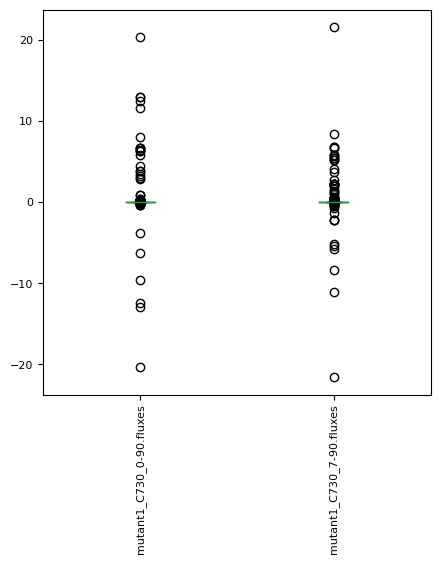

In [45]:
plt1 = mutant1_results.boxplot(column=['mutant1_C730_0-90.fluxes', 'mutant1_C730_7-90.fluxes'],figsize = (5,5), rot = 90, fontsize= '8', grid = False)

<AxesSubplot:ylabel='Density'>

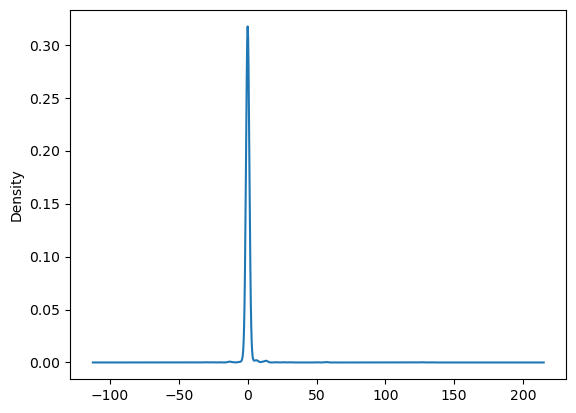

In [46]:
model2_results['model2_C730_0-90.fluxes'].plot.kde()

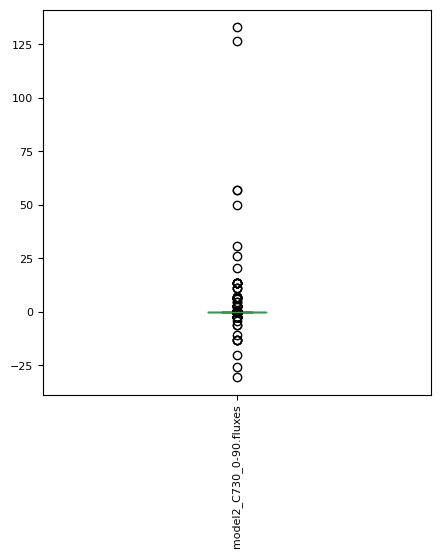

In [47]:
plt2 = model2_results.boxplot(column=['model2_C730_0-90.fluxes'],figsize = (5,5), rot = 90, fontsize= '8', grid = False)

<AxesSubplot:ylabel='Density'>

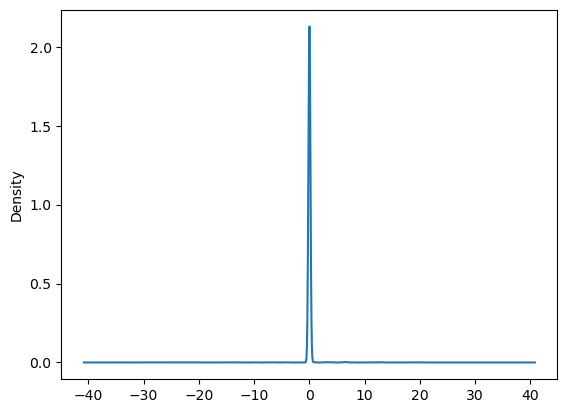

In [48]:
mutant1_results['mutant1_C730_0-90.fluxes'].plot.kde()

In [49]:
plt2

<AxesSubplot:>

In [50]:
model2_results_90_high_flux = model2_results.loc[(model2_results['model2_C730_0-90.fluxes'] >= 0.0039) | (model2_results['model2_C730_7-90.fluxes'] >= 0.0046) |  (model2_results['model2_C730_12-90.fluxes'] >= 0.0046) | (model2_results['model2_C730_20-90.fluxes'] >= 0.0046) ] 

In [51]:
model2_results_90_high_flux.to_excel('model2_results_90_high_flux.xlsx')

In [52]:
q1 = model2_results['model2_C730_0-90.fluxes'].quantile(0.95)

In [53]:
q1

0.003919420000002402

In [54]:
 model2_results['model2_C730_7-90.fluxes'].quantile(0.95)

0.00466456

In [55]:
 model2_results['model2_C730_12-90.fluxes'].quantile(0.95)

0.004691310000000001

In [56]:
 model2_results['model2_C730_20-90.fluxes'].quantile(0.95)

0.004691310000000001

In [57]:
q1 = mutant1_results['mutant1_C730_7-90.fluxes'].quantile(0.95)

In [58]:
q1

0.0009473799999999998

In [59]:
mutant1_results['mutant1_C730_0-90.fluxes'].quantile(0.95)

0.0009473799999999999

In [60]:
mutant1_results_90_high_flux = mutant1_results.loc[(mutant1_results['mutant1_C730_0-90.fluxes'] >= 0.00094) | (mutant1_results['mutant1_C730_7-90.fluxes'] >= 0.00094) ] 

In [61]:
mutant1_results_90_high_flux.to_excel('mutant1_results_90_high_flux.xlsx')

In [62]:
mutant1_results.columns

Index(['index', 'mutant1_C730_0-14.fluxes', 'mutant1_C730_0-14.reduced_costs',
       'mutant1_C730_7-14.fluxes', 'mutant1_C730_7-14.reduced_costs',
       'mutant1_C730_12-14.fluxes', 'mutant1_C730_12-14.reduced_costs',
       'mutant1_C730_20-14.fluxes', 'mutant1_C730_20-14.reduced_costs',
       'mutant1_C730_0-25.fluxes', 'mutant1_C730_0-25.reduced_costs',
       'mutant1_C730_7-25.fluxes', 'mutant1_C730_7-25.reduced_costs',
       'mutant1_C730_12-25.fluxes', 'mutant1_C730_12-25.reduced_costs',
       'mutant1_C730_20-25.fluxes', 'mutant1_C730_20-25.reduced_costs',
       'mutant1_C730_0-38.fluxes', 'mutant1_C730_0-38.reduced_costs',
       'mutant1_C730_7-38.fluxes', 'mutant1_C730_7-38.reduced_costs',
       'mutant1_C730_12-38.fluxes', 'mutant1_C730_12-38.reduced_costs',
       'mutant1_C730_20-38.fluxes', 'mutant1_C730_20-38.reduced_costs',
       'mutant1_C730_0-49.fluxes', 'mutant1_C730_0-49.reduced_costs',
       'mutant1_C730_7-49.fluxes', 'mutant1_C730_7-49.reduced_costs',

In [63]:
import seaborn as sns

<AxesSubplot:xlabel='mutant1_C730_7-90.fluxes', ylabel='mutant1_C730_0-90.fluxes'>

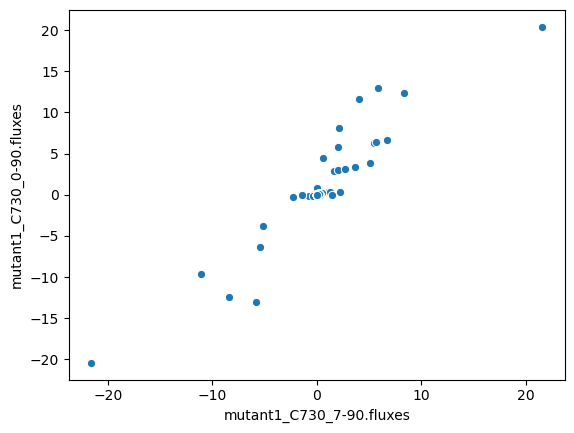

In [64]:
sns.scatterplot(x='mutant1_C730_7-90.fluxes',y='mutant1_C730_0-90.fluxes', data=mutant1_results)

In [65]:
df_com = pd.merge(model2_results,mutant1_results, how='inner',on='index')

In [66]:
#df_com.fillna('Absent', inplace=True)

In [67]:
df_com.head()

,index,model2_C730_0-14.fluxes,model2_C730_0-14.reduced_costs,model2_C730_7-14.fluxes,model2_C730_7-14.reduced_costs,model2_C730_12-14.fluxes,model2_C730_12-14.reduced_costs,model2_C730_20-14.fluxes,model2_C730_20-14.reduced_costs,model2_C730_0-25.fluxes,...,mutant1_C730_12-49.fluxes,mutant1_C730_12-49.reduced_costs,mutant1_C730_20-49.fluxes,mutant1_C730_20-49.reduced_costs,mutant1_C730_0-90.fluxes,mutant1_C730_0-90.reduced_costs,mutant1_C730_7-90.fluxes,mutant1_C730_7-90.reduced_costs,Reaction with RID_y,Reaction with Rname_y
0,ALAD_L,0.000000,4.0,0.000000,4.0,0.000000,4.0,0.000000,4.0,0.000000,...,0.00000,4.0,0.0,4.00,0.00000,4.0,0.000000,4.00,ala__L_c + h2o_c + nad_c --> h_c + nadh_c + nh...,L-Alanine + H2O H2O + Nicotinamide adenine din...
1,ALAR,0.213507,-2.0,0.178901,-2.0,0.225202,-2.0,0.217881,-2.0,0.002084,...,0.00185,-2.0,0.0,-2.00,0.00185,-2.0,0.000000,-2.00,ala__L_c <=> ala__D_c,L-Alanine <=> D-Alanine
2,ALATA_L,-0.876238,2.0,-0.734213,2.0,-0.924232,2.0,-0.894185,2.0,-0.008551,...,0.00000,2.0,0.0,2.00,0.00000,2.0,-0.005235,2.00,akg_c + ala__L_c <=> glu__L_c + pyr_c,2-Oxoglutarate + L-Alanine <=> L-Glutamate + P...
3,ASNS1,0.187969,-2.0,0.157502,-2.0,0.198264,-2.0,0.191819,-2.0,0.001834,...,0.00000,89.0,0.0,67.25,0.00000,69.0,0.000000,67.25,asp__L_c + atp_c + gln__L_c + h2o_c --> amp_c ...,L-Aspartate + ATP C10H12N5O13P3 + L-Glutamine ...
4,ASPO1,0.000000,439.0,0.000000,439.0,0.000000,439.0,0.000000,439.0,0.000000,...,0.00000,2.0,0.0,2.00,0.00000,2.0,0.000000,2.00,asp__L_c + h2o_c + o2_c --> h2o2_c + nh4_c + o...,L-Aspartate + H2O H2O + O2 O2 --> Hydrogen per...


In [68]:
df_com.columns

Index(['index', 'model2_C730_0-14.fluxes', 'model2_C730_0-14.reduced_costs',
       'model2_C730_7-14.fluxes', 'model2_C730_7-14.reduced_costs',
       'model2_C730_12-14.fluxes', 'model2_C730_12-14.reduced_costs',
       'model2_C730_20-14.fluxes', 'model2_C730_20-14.reduced_costs',
       'model2_C730_0-25.fluxes', 'model2_C730_0-25.reduced_costs',
       'model2_C730_7-25.fluxes', 'model2_C730_7-25.reduced_costs',
       'model2_C730_12-25.fluxes', 'model2_C730_12-25.reduced_costs',
       'model2_C730_20-25.fluxes', 'model2_C730_20-25.reduced_costs',
       'model2_C730_0-38.fluxes', 'model2_C730_0-38.reduced_costs',
       'model2_C730_7-38.fluxes', 'model2_C730_7-38.reduced_costs',
       'model2_C730_12-38.fluxes', 'model2_C730_12-38.reduced_costs',
       'model2_C730_20-38.fluxes', 'model2_C730_20-38.reduced_costs',
       'model2_C730_0-49.fluxes', 'model2_C730_0-49.reduced_costs',
       'model2_C730_7-49.fluxes', 'model2_C730_7-49.reduced_costs',
       'model2_C730_12-49.f

<AxesSubplot:xlabel='model2_C730_7-90.fluxes', ylabel='mutant1_C730_7-90.fluxes'>

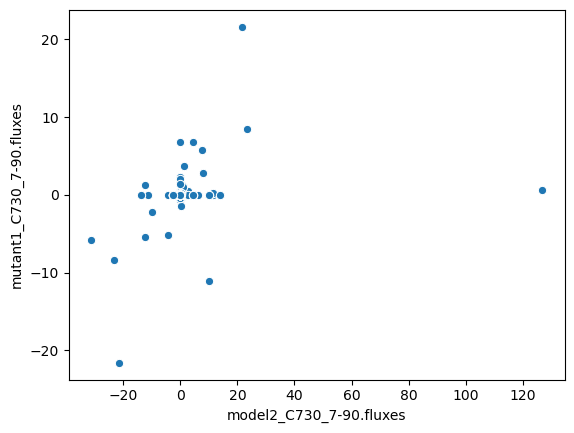

In [69]:
sns.scatterplot(data=df_com, x='model2_C730_7-90.fluxes',y='mutant1_C730_7-90.fluxes' )

In [70]:
mutant1.objective = 'EX_MonensinA_e0'

In [71]:
cobra.flux_analysis.pfba(mutant1)

,fluxes,reduced_costs
12DGR120tipp,0.00000,-2.000000
12DGR140tipp,0.00000,-2.000000
12DGR141tipp,0.00000,-2.000000
12DGR160tipp,0.00000,-2.000000
12DGR161tipp,0.00000,-2.000000
...,...,...
MonA_Transp_c0,21.73913,-2.000000
MonB_Synth_c0,0.00000,493.117647
MonB_Transp_c0,0.00000,-2.000000
EX_MonensinA_e0,21.73913,-2.000000


In [72]:
df = mutant1.optimize().to_frame()

In [73]:
df.to_excel('Monensin_optimize.xlsx')

In [74]:
mutant1.objective='ATPM'

In [75]:
medium = mutant1.medium
medium["EX_cit_e"] = 1000
#medium['EX_h_e'] = 0.0
mutant1.medium = medium

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


In [76]:
li = ['CS','ACS','ACONT','ACONTb','ICDHyr','PPS','ASNS1']

In [77]:
list(mutant1_results)

['index',
 'mutant1_C730_0-14.fluxes',
 'mutant1_C730_0-14.reduced_costs',
 'mutant1_C730_7-14.fluxes',
 'mutant1_C730_7-14.reduced_costs',
 'mutant1_C730_12-14.fluxes',
 'mutant1_C730_12-14.reduced_costs',
 'mutant1_C730_20-14.fluxes',
 'mutant1_C730_20-14.reduced_costs',
 'mutant1_C730_0-25.fluxes',
 'mutant1_C730_0-25.reduced_costs',
 'mutant1_C730_7-25.fluxes',
 'mutant1_C730_7-25.reduced_costs',
 'mutant1_C730_12-25.fluxes',
 'mutant1_C730_12-25.reduced_costs',
 'mutant1_C730_20-25.fluxes',
 'mutant1_C730_20-25.reduced_costs',
 'mutant1_C730_0-38.fluxes',
 'mutant1_C730_0-38.reduced_costs',
 'mutant1_C730_7-38.fluxes',
 'mutant1_C730_7-38.reduced_costs',
 'mutant1_C730_12-38.fluxes',
 'mutant1_C730_12-38.reduced_costs',
 'mutant1_C730_20-38.fluxes',
 'mutant1_C730_20-38.reduced_costs',
 'mutant1_C730_0-49.fluxes',
 'mutant1_C730_0-49.reduced_costs',
 'mutant1_C730_7-49.fluxes',
 'mutant1_C730_7-49.reduced_costs',
 'mutant1_C730_12-49.fluxes',
 'mutant1_C730_12-49.reduced_costs',
 

In [78]:
for i in li:
    i1 = mutant1_results[mutant1_results['index'] == i]
    print(i1['Reaction with Rname'].values)

['Acetyl-CoA + H2O H2O + Oxaloacetate --> Citrate + Coenzyme A + H+']
['Acetate + ATP C10H12N5O13P3 + Coenzyme A --> Acetyl-CoA + AMP C10H12N5O7P + Diphosphate']
['Citrate <=> Isocitrate']
['Cis-Aconitate + H2O H2O <=> Isocitrate']
['Isocitrate + Nicotinamide adenine dinucleotide phosphate <=> 2-Oxoglutarate + CO2 CO2 + Nicotinamide adenine dinucleotide phosphate - reduced']
['ATP C10H12N5O13P3 + H2O H2O + Pyruvate --> AMP C10H12N5O7P + 2.0 H+ + Phosphoenolpyruvate + Phosphate']
['L-Aspartate + ATP C10H12N5O13P3 + L-Glutamine + H2O H2O --> AMP C10H12N5O7P + L-Asparagine + L-Glutamate + H+ + Diphosphate']


In [79]:
solution = cobra.flux_analysis.pfba(mutant1)

In [80]:
mutant1.slim_optimize()

333.3333333333334

In [81]:
for x in mutant1.metabolites.get_by_id('cit_e').reactions:
    print(x.id)
    print(x.build_reaction_string(use_metabolite_names = False))
    print(solution[x.id])

EX_cit_e
cit_e <=> 
-166.66666666666632
CITtex
cit_e <=> cit_p
0.0
FEDCabc
atp_c + 2.0 cit_e + fe3_e + h2o_c --> adp_c + 2.0 cit_c + fe3_c + h_c + pi_c
0.0
CITt14
ca2_e + cit_e + h_e --> ca2_c + cit_c + h_c
166.66666666666634


In [82]:
for x in mutant1.metabolites.get_by_id('cit_p').reactions:
    if abs(solution[x.id]) > 0.0:
        print(x.id)
        print(x.build_reaction_string(use_metabolite_names = False))
        print(solution[x.id])

In [83]:
for x in mutant1.metabolites.get_by_id('cit_c').reactions:
    if abs(solution[x.id]) > 0.0:
        print(x.id)
        print(x.build_reaction_string(use_metabolite_names = False))
        print(solution[x.id])

CS
accoa_c + h2o_c + oaa_c --> cit_c + coa_c + h_c
166.66666666666632
ACONT
cit_c <=> icit_c
333.33333333333263
CITt14
ca2_e + cit_e + h_e --> ca2_c + cit_c + h_c
166.66666666666634


In [84]:
for x in mutant1.metabolites.get_by_id('icit_c').reactions:
    if abs(solution[x.id]) > 0.0:
        print(x.id)
        print(x.build_reaction_string(use_metabolite_names = False))
        print(solution[x.id])

ICDHyr
icit_c + nadp_c <=> akg_c + co2_c + nadph_c
333.33333333333263
ACONT
cit_c <=> icit_c
333.33333333333263


In [85]:
for x in mutant1.metabolites.get_by_id('akg_c').reactions:
    if abs(solution[x.id]) > 1e-9:
        print(x.id)
        print(x.build_reaction_string(use_metabolite_names = False))
        print(solution[x.id])

ICDHyr
icit_c + nadp_c <=> akg_c + co2_c + nadph_c
333.33333333333263
AKGDH
akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
333.33333333333263


In [86]:
for x in mutant1.metabolites.get_by_id('succoa_c').reactions:
    if abs(solution[x.id]) > 0.0:
        print(x.id)
        print(x.build_reaction_string(use_metabolite_names = False))
        print(solution[x.id])

SUCOAS
atp_c + coa_c + succ_c <=> adp_c + pi_c + succoa_c
-333.3333333333327
AKGDH
akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
333.33333333333263


In [87]:
for x in mutant1.metabolites.get_by_id('succ_c').reactions:
    if abs(solution[x.id]) > 0.0:
        print(x.id)
        print(x.build_reaction_string(use_metabolite_names = False))
        print(solution[x.id])

SUCOAS
atp_c + coa_c + succ_c <=> adp_c + pi_c + succoa_c
-333.3333333333327
FRD2rpp
2.0 h_p + mqn8_c + succ_c --> fum_c + 2.0 h_c + mql8_c
333.3333333333327


In [88]:
for x in mutant1.metabolites.get_by_id('fum_c').reactions:
    if abs(solution[x.id]) > 0.0:
        print(x.id)
        print(x.build_reaction_string(use_metabolite_names = False))
        print(solution[x.id])

FUM
fum_c + h2o_c <=> mal__L_c
333.3333333333327
MALEI
male_c <=> fum_c
3.573704331462485e-14
FRD2rpp
2.0 h_p + mqn8_c + succ_c --> fum_c + 2.0 h_c + mql8_c
333.3333333333327


In [89]:
for x in mutant1.metabolites.get_by_id('mal__L_c').reactions:
    if abs(solution[x.id]) > 0.0:
        print(x.id)
        print(x.build_reaction_string(use_metabolite_names = False))
        print(solution[x.id])

FUM
fum_c + h2o_c <=> mal__L_c
333.3333333333327
ME2
mal__L_c + nadp_c --> co2_c + nadph_c + pyr_c
166.66666666666634
MDH
mal__L_c + nad_c <=> h_c + nadh_c + oaa_c
166.66666666666634


In [90]:
mutant1.objective.expression

1.0*ATPM - 1.0*ATPM_reverse_5b752

In [91]:
mutant1.objective='ATPM'

In [92]:
mutant1.medium

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


{'EX_ca2_e': 1000.0,
 'EX_cit_e': 1000,
 'EX_cl_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_hdca_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_met__L_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_no3_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_zn2_e': 1000.0}

In [93]:
for x in mutant1.metabolites.get_by_id('pyr_c').reactions:
    if abs(solution[x.id]) > 0.0:
        print(x.id)
        print(x.build_reaction_string(use_metabolite_names = False))
        print(solution[x.id])

PYK
adp_c + h_c + pep_c --> atp_c + pyr_c
5.956173885770811e-14
PFL
coa_c + pyr_c --> accoa_c + for_c
-3.5737043314624856e-14
ME2
mal__L_c + nadp_c --> co2_c + nadph_c + pyr_c
166.66666666666634
PDH
coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
166.6666666666664


In [94]:
for x in mutant1.metabolites.get_by_id('nadh_c').reactions:
    if abs(solution[x.id]) > 1e-9:
        print(x.id)
        print(x.build_reaction_string(use_metabolite_names = False))
        print(solution[x.id])

NOX
h_c + nadh_c + o2_c --> h2o2_c + nad_c
666.6666666666656
PDH
coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
166.6666666666664
AKGDH
akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
333.33333333333263
MDH
mal__L_c + nad_c <=> h_c + nadh_c + oaa_c
166.66666666666634


In [95]:
for x in mutant1.metabolites.get_by_id('h2o2_c').reactions:
    if abs(solution[x.id]) > 1e-9:
        print(x.id)
        print(x.build_reaction_string(use_metabolite_names = False))
        print(solution[x.id])

CAT
2.0 h2o2_c --> 2.0 h2o_c + o2_c
333.33333333333286
NOX
h_c + nadh_c + o2_c --> h2o2_c + nad_c
666.6666666666656


In [96]:
for x in mutant1.metabolites.get_by_id('o2_c').reactions:
    if abs(solution[x.id]) > 1e-9:
        print(x.id)
        print(x.build_reaction_string(use_metabolite_names = False))
        print(solution[x.id])

CYTBD2pp
2.0 h_c + mql8_c + 0.5 o2_c --> h2o_c + 2.0 h_p + mqn8_c
333.3333333333327
CAT
2.0 h2o2_c --> 2.0 h2o_c + o2_c
333.33333333333286
NOX
h_c + nadh_c + o2_c --> h2o2_c + nad_c
666.6666666666656
O2tpp
o2_p <=> o2_c
749.9999999999986
MEHLER
h_c + nadph_c + 0.5 o2_c --> h2o_c + nadp_c
499.99999999999903


In [97]:
for x in mutant1.metabolites.get_by_id('mql8_c').reactions:
    if abs(solution[x.id]) > 1e-9:
        print(x.id)
        print(x.build_reaction_string(use_metabolite_names = False))
        print(solution[x.id])

FRD2rpp
2.0 h_p + mqn8_c + succ_c --> fum_c + 2.0 h_c + mql8_c
333.3333333333327
CYTBD2pp
2.0 h_c + mql8_c + 0.5 o2_c --> h2o_c + 2.0 h_p + mqn8_c
333.3333333333327


In [98]:
for x in mutant1.metabolites.get_by_id('h_p').reactions:
    if abs(solution[x.id]) > 1e-9:
        print(x.id)
        print(x.build_reaction_string(use_metabolite_names = False))
        print(solution[x.id])

FRD2rpp
2.0 h_p + mqn8_c + succ_c --> fum_c + 2.0 h_c + mql8_c
333.3333333333327
CYTBD2pp
2.0 h_c + mql8_c + 0.5 o2_c --> h2o_c + 2.0 h_p + mqn8_c
333.3333333333327


In [99]:
for x in mutant1.metabolites.get_by_id('atp_c').reactions:
    if abs(solution[x.id]) > 1e-9:
        print(x.id)
        print(x.build_reaction_string(use_metabolite_names = False))
        print(solution[x.id])

SUCOAS
atp_c + coa_c + succ_c <=> adp_c + pi_c + succoa_c
-333.3333333333327
ATPM
atp_c + h2o_c --> adp_c + h_c + pi_c
333.33333333333275


In [100]:
for x in mutant1.metabolites.get_by_id('h_e').reactions:
    print(x.id)
    print(x.build_reaction_string(use_metabolite_names = False))
    print(solution[x.id])

DADNt2
dad_2_e + h_e --> dad_2_c + h_c
0.0
SO4t2
h_e + so4_e --> h_c + so4_c
0.0
BALAt2r
ala_B_e + h_e --> ala_B_c + h_c
0.0
3UMPt6
3ump_e + h_e --> 3ump_c + h_c
0.0
VALt2r
h_e + val__L_e --> h_c + val__L_c
0.0
DAGLIPA181d9ex
dag181d9_e + h2o_e --> 1ag181d9_e + h_e + ocdcea_e
0.0
LIPOPBt
h_e + lipoate_e --> h_c + lipoate_c
0.0
GALt2_3
gal_bD_e + h_e --> gal_bD_c + h_c
0.0
ILEt2r
h_e + ile__L_e --> h_c + ile__L_c
0.0
ADNt2
adn_e + h_e --> adn_c + h_c
0.0
CAt4
ca2_c + h_e --> ca2_e + h_c
166.66666666666634
CRO4t3
cro4_c + h_e --> cro4_e + h_c
0.0
Htex
h_e <=> h_p
0.0
GALCTNt2r
galctn__D_e + h_e --> galctn__D_c + h_c
0.0
GLCURt2r
glcur_e + h_e --> glcur_c + h_c
0.0
SUCRt2
h_e + sucr_e --> h_c + sucr_c
0.0
CHLt2
chol_e + h_e --> chol_c + h_c
0.0
DALAt2r
ala__D_e + h_e --> ala__D_c + h_c
0.0
NTR3B
2.0 h_c + mql7_c + no3_c --> h2o_c + 2.0 h_e + mqn7_c + no2_c
0.0
CYTBD2
2.0 h_c + mql8_c + 0.5 o2_c --> h2o_c + 2.0 h_e + mqn8_c
0.0
NAt6
h_e + na1_e --> h_c + na1_c
83.33333333333302
CYTB_B2
2.0

In [101]:
medium = mutant1.medium
medium["EX_cit_e"] = 0.0
medium['EX_glc__D_e'] = 1000
mutant1.medium = medium

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


In [102]:
mutant1.medium

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


{'EX_ca2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_glc__D_e': 1000,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_hdca_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_met__L_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_no3_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_zn2_e': 1000.0}

In [103]:
mutant1.slim_optimize()

1000.0

Add sink reaction for acetyl coA
Set sink reaction as the objective
optimize the model
Ex_accoa_c <=> 
lower bounds 0
upper bounds 1000
check in media with Glucose
check in media with hdca
what is the fate of co2. which reversible reaction my be incorrect.